# Applications

Here, I am working up a few probabilistic applications of the ideas for the paper on the Age Area Hypothesis. 

In [1]:
import os
import pandas as pd
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import random

from IPython.display import Image

start_dir = os.getcwd()
python_dir = pathlib.Path(os.getcwd()).parts[:-1] + ('Python',)
os.chdir(pathlib.Path(*python_dir))

from PyInstEvo import *

os.chdir(start_dir)
os.chdir('..')

pd.set_option('display.width', 1000)
np.set_printoptions(linewidth=120)

%matplotlib inline

In [2]:
Data = pd.read_pickle(os.getcwd() + '//IEData//MasterData.pkl')

We can declare a class using the "ResolvedTree" class. Here it is:

Traditionally, we have instituted the whole procedure from a data frame as follows, so one idea might be to work with that. So, we can do:

In [3]:
UY = PhyloTree(Data.loc[Data['ruhlen_1'] == 'URALICYUK'], 'test')

In [4]:
UralicYukRT = ResolvedTree(Data.loc[Data['ruhlen_1'] == 'URALICYUK'], 'UYTree1')  #Create a resolved tree
numbranches = UralicYukRT.interiorbranches                                        #Get no. of interior branches
bInit       = np.matrix(- 1 - np.linspace(0,10,num=numbranches)/numbranches)      #Make a conformable set of parameters
rInit       = np.zeros((1, len(UralicYukRT.words)))                                            #initial rate parameters
dparms      = np.sum(UralicYukRT.deathmat[:,0] == 0)                                           #Number of death parameters needed
dInit       = np.zeros((1, dparms)) + 1                                                      #Values for death parameters
eInit       = np.matrix(5)                                                                   #Overall depth parameter
parmsInit   = np.hstack((bInit, rInit, dInit, eInit)) 

In [5]:
things = vars(UralicYukRT)
print(things.keys()) 
things = vars(UY)
print(things.keys())

dict_keys(['title', 'Data', 'BaseTree', 'name', 'states', 'lat', 'lon', 'D', 'deathmat', 'deathdata', 'resolvedtree', 'branchpositions', 'numberbranches', 'interiorbranches', 'builtcols', 'dimInfo', 'order'])
dict_keys(['title', 'Data', 'BaseTree', 'name', 'states', 'lat', 'lon', 'D', 'deathmat', 'deathdata'])


So, we see that a resolved tree has a few more things in it than a simple tree, most of which pertains to the way in which the tree was randomly resolved. 

To use the methods, we need a bunch of things first.

In [6]:
def DFill():
    words = ['word1', 'word2', 'word3', 'word11', 'word12', 'word18', 'word19',
           'word21', 'word22', 'word23', 'word25', 'word28', 'word30', 
           'word31', 'word34', 'word39', 'word40', 'word41', 'word43', 
           'word44', 'word47', 'word48', 'word51', 'word53', 'word54', 
           'word57', 'word58', 'word61', 'word66', 'word72', 'word74',
           'word75', 'word77', 'word82', 'word85', 'word86', 'word92', 
           'word95', 'word96', 'word100']
        
    namelist = [ 'TR' + str(x) for x in range(1, 17) ]  

    dim1 = len(words)
    DogList = ['p', 't', 's', 'c', 'm', 'N', 'l', 'w', 'y', 'i']

    # Creates a list of all the names of states variables. 
    
    statenames=[]
    for i in range(0, dim1):
        for j in range(0, 10):
            statenames.append(words[i] + str(i) + '_' + DogList[j])    

    A={}
    for a in namelist + statenames + ['name', 'lat', 'lon', 'deadOne', 'ex_date', 'ex_date_sd']:
        A[a] = [0]

    DF = pd.DataFrame(A)           
    
    return(DF)

Now, we can make a base tree with really no attributes and we can fill in various things as we go. So:

In [10]:
SemiticTree = PhyloTree(DFill(), 'Test')

We will try and fill in a tree with the basic details of the following Tree, as estimated in the paper. Note that we should be able to calibrate the branches to have roughly the standard errors in the Tree...

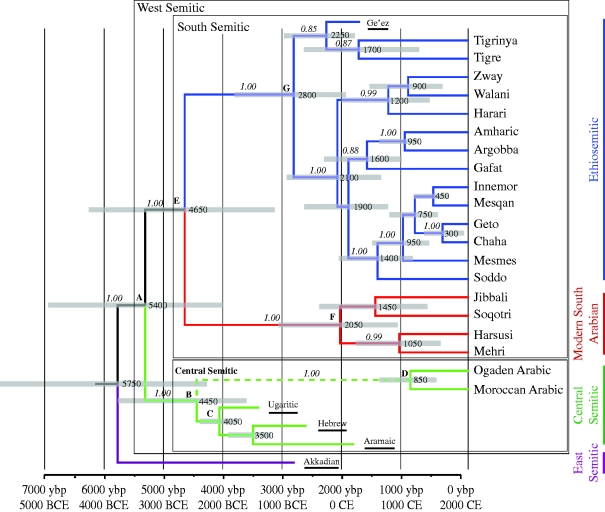

In [18]:
file = os.getcwd() + '\\SavedFigures\\rspb20090408fig2.jpg'
Image(filename = file)

In [29]:
names = ['Geez', 'Tigrinya', 'Tigre', 'Zway', 'Walani', 'Harari', 'Amharic', 'Argobba', 'Gafat',
         'Innemor', 'Mesqan', 'Geto', 'Chaha', 'Mesmes', 'Soddo', 'Jibbali', 'Soqotri',
         'Harsusi', 'Mehri', 'Ogaden Arabic', 'Moroccan Arabic', 'Ugaritic', 'Hebrew', 'Aramaic']

names_to_add = []
for name in names:
    names_to_add.append([name])

In [25]:
Try.name = names_to_add

Next, we can add in the current day location of each people. We can get these from the Ethnographic Atlas or by just looking them up. Coordinates are longitude, then latitude:

In [57]:
locs = {'Geez': [41., 12.94], 'Tigrinya': [39., 14.], 'Tigre': [39., 17.],
        'Zway': [38.72, 7.93], 'Walani': [36.5, 6.5], 'Harari': [36.4, 9.65],
        'Amharic': [39.2, 12.5], 'Argobba': [38.72, 10.67], 'Gafat': [37, 12.2],
        'Innemor': [36.67, 8.33], 'Mesqan': [38.38, 8.12], 'Geto': [39.2, 8.2], 
        'Chaha': [39.6, 8.9], 'Mesmes': [37.1, 7.5], 'Soddo': [42.85, 6.6],
        'Jibbali': [54.84, 17.27], 'Soqotri': [53.77, 12.55],
        'Harsusi': [55.9, 19.91], 'Mehri':[51.66, 17.06], 
        'Ogaden Arabic':[44.58, 7.39], 'Moroccan Arabic':[-6.93, 32.64],
        'Ugaritic': [35.79, 35.60], 'Hebrew':[34.88, 31.66], 'Aramaic': [40.08, 36.30],
        'Akkadian':[46.5, 32.05] }

lats = []
lons = []
for item in locs:
    lons.append(locs[item][0])
    lats.append(locs[item][1])

In [58]:
plt.scatter(lons, lats)
mplleaflet.display()

Which looks about right. In any event, next we have:

In [65]:
Try.lat = np.array(lats)
Try.lon = np.array(lons)
Try.D = gcircledist(Try.lat, Try.lon)